David Guio Solano
Predicción de Enfermedad Cardiaca con Regresión Logística

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [113]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
# lectura de datos en Python y lo cargamos en la variable Datos
datos = pd.read_csv('./heart_cleveland_upload.csv')

In [117]:
# Realizamos lectura de los Datos para el análisis exploratorio
datos.head(40) #298

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [119]:
# Descripción de los datos
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos (Presion arterial en reposo)')

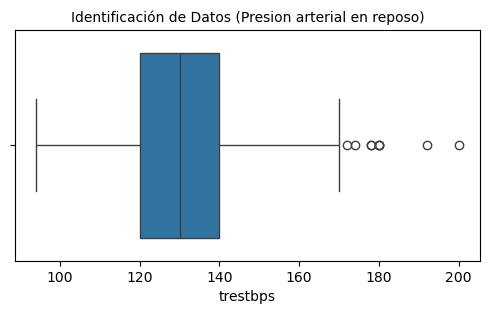

In [49]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['trestbps']) #indicamos que columna graficar
plt.title('Identificación de Datos (Presion arterial en reposo)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Frecuencia cardiaca maxima alcanzada)')

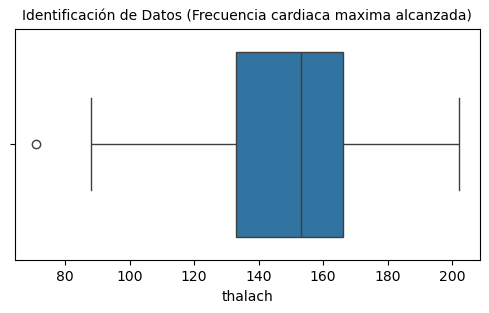

In [124]:
plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['thalach']) #indicamos que columna graficar
plt.title('Identificación de Datos (Frecuencia cardiaca maxima alcanzada)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Depresión del segmento ST inducida por el ejercicio en relación con el reposo)')

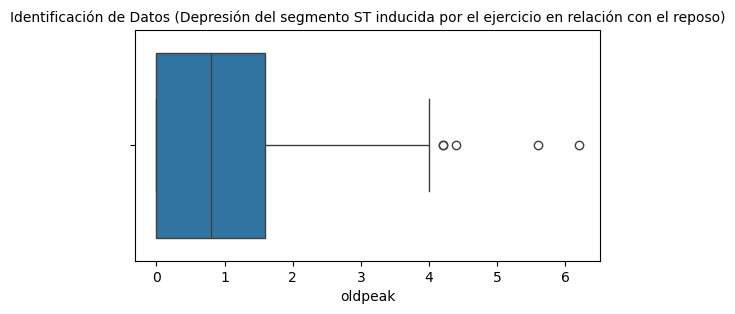

In [122]:
plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['oldpeak']) #indicamos que columna graficar
plt.title('Identificación de Datos (Depresión del segmento ST inducida por el ejercicio en relación con el reposo)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Colesterol serico en mg/dl)')

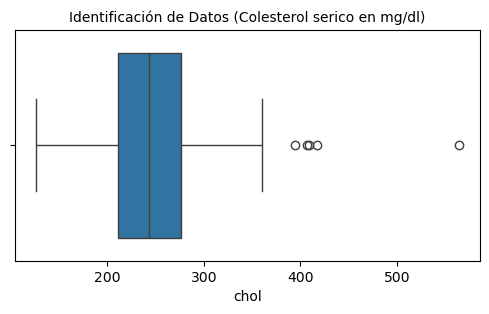

In [80]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['chol'])
plt.title('Identificación de Datos (Colesterol serico en mg/dl)', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [121]:
#Revisión de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Presion arterial en reposo: ",datos['trestbps'].isin([0]).sum()) 
print("Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada: ",datos['thalach'].isin([0]).sum())
#print("Cantidad de Registros con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo: ",datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol serico en mg/dl: ",datos['chol'].isin([0]).sum())

Cantidad de Registros con cero en Presion arterial en reposo:  0
Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada:  0
Cantidad de Registros con cero en Colesterol serico en mg/dl:  0


#No encontramos valores cero pero entonces si tenemos valores que estan fuera de lo normal que son los circulos blancos 
#fuera de la grafica en el punto anterior
#En este data set no encontramos valores en ceros o nulls ya que el datas set esta completo y que los datos manejan cero y unos
#Para saber en que categoria estan los pacientes 

In [123]:
#Conteo de Datos Atípicos

#Presion arterial en reposo
nivel_minimo=80
nivel_maximo=120
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))



#Depresión del segmento ST inducida por el ejercicio en relación con el reposo
#nivel_minimo_DS_ST=1
#nivel_maximo_DS_ST=2
#Total_Atipicos_DS_ST=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
#print("El total de datos atípicos del depresión del segmento ST es {}".format(Total_Atipicos_DS_ST))

#Colesterol serico en mg/dl
#nivel_minimo_CS=50
#nivel_maximo_CS=60
#Total_Atipicos_CS=((datos['chol']<nivel_minimo_CS)|(datos['chol']>nivel_maximo_CS)).sum()
#print("El total de datos atípicos del colesterol serico es {}".format(Total_Atipicos_CS))



El total de datos atípicos es 200


In [125]:
# Filtra Datos Atípicos

datos=datos[(datos['trestbps']<nivel_maximo)&(datos['trestbps']>nivel_minimo)]

#datos=datos[(datos['oldpeak']<nivel_maximo_DS_ST)&(datos['oldpeak']>nivel_minimo_DS_ST)]
#datos=datos[(datos['chol']<nivel_maximo_CS)&(datos['chol']>nivel_minimo_CS)]

In [127]:
# Validar si se removieron los datos atípicos

#Presion arterial en reposo
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))



#Depresión del segmento ST inducida por el ejercicio en relación con el reposo
#Total_Atipicos_DS_ST=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
#print("El total de datos atípicos del depresión del segmento ST es {}".format(Total_Atipicos_DS_ST))

#Colesterol serico en mg/dl
#Total_Atipicos_CS=((datos['chol']<nivel_minimo_CS)|(datos['chol']>nivel_maximo_CS)).sum()
#print("El total de datos atípicos del colesterol serico es {}".format(Total_Atipicos_CS))

El total de datos atípicos es 0


In [129]:
#Revisión del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 4 to 293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        60 non-null     int64  
 1   sex        60 non-null     int64  
 2   cp         60 non-null     int64  
 3   trestbps   60 non-null     int64  
 4   chol       60 non-null     int64  
 5   fbs        60 non-null     int64  
 6   restecg    60 non-null     int64  
 7   thalach    60 non-null     int64  
 8   exang      60 non-null     int64  
 9   oldpeak    60 non-null     float64
 10  slope      60 non-null     int64  
 11  ca         60 non-null     int64  
 12  thal       60 non-null     int64  
 13  condition  60 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 7.0 KB


In [29]:
#Frecuencia acardiaca maxima alcanzada
nivel_minimo_FMC=60
nivel_maximo_FMC=100
Total_Atipicos_FCM=((datos['thalach']<nivel_minimo_FMC)|(datos['thalach']>nivel_maximo_FMC)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca es {}".format(Total_Atipicos_FCM))

El total de datos atípicos de la Frecuencia cardiaca es 60


In [31]:
datos=datos[(datos['thalach']<nivel_maximo_FMC)&(datos['thalach']>nivel_minimo_FMC)]

In [33]:
#Frecuencia acardiaca maxima alcanzada
Total_Atipicos_FCM=((datos['thalach']<nivel_minimo_FMC)|(datos['thalach']>nivel_maximo_FMC)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca es {}".format(Total_Atipicos_FCM))

El total de datos atípicos de la Frecuencia cardiaca es 0


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
-trestbpscosaber cuantasla personno tiene presion arterial en reposo sabiendo que elnominimo=80 - maximo=120es-)
Predeccuantas personas estan en el promedio normal de la presión arterialtes

In [131]:
# Total de personas con presion arterial

datos['trestbps'].value_counts()

trestbps
110    19
112     9
118     7
108     6
100     4
105     3
115     3
102     2
94      2
101     1
106     1
117     1
114     1
104     1
Name: count, dtype: int64

In [133]:
datos[['trestbps']].head(40)

,trestbps
4,110
15,118
18,110
22,118
43,108
52,110
54,101
55,105
57,112
65,105


In [139]:
# Total de personas con Frecuencia cardiaca maxima alcanzada

datos['thalach'].value_counts()

thalach
160    4
156    3
143    3
158    3
126    3
168    2
154    2
179    2
140    2
122    2
132    2
172    2
125    2
142    2
153    2
118    1
148    1
159    1
185    1
147    1
108    1
177    1
169    1
181    1
161    1
144    1
149    1
175    1
152    1
190    1
123    1
167    1
165    1
151    1
130    1
192    1
138    1
174    1
114    1
Name: count, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [135]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('trestbps',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = datos['trestbps'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [137]:
print (X_train)

NameError: name 'X_train' is not defined

In [109]:
print (Y_train)

NameError: name 'Y_train' is not defined

5. Entrenar el modelo configurando los diferentes hiperparámetros

In [ ]:

# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [ ]:
print (Y_test)

In [ ]:
print (Prediccion)

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc